# Hydrograph Development Notebooks: Data Exploration

    Overview: This notebook was created to document data exploration of the availability/applicability of USGS gage Data in the vicinity of the levees in Lisle & Whitney Point NY.


## Introduction

##### 1. Go to the USGS gage listing page for NY, search for the flooding source of interest:
  TIOUGHNIOGA RIVER

In [1]:
import os
from glob import glob
from importlib import reload
import utils; reload(utils)
from utils import *
%matplotlib inline

#--Direct Link to USGS Data & Map
GotoUSGS('NY')


CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=NY&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list

CLICK HERE FOR MAP: 
 https://maps.waterdata.usgs.gov/mapper/index.html


In [2]:
data_dir =os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'sample_data')
region_name = "TIOUGHNIOGA_RIVER"
output_dataset = os.path.join(data_dir, '{}.pkl'.format(region_name))
tsvs = glob(os.path.join(data_dir, '015*'))

metadata = os.path.join(data_dir ,'gage_metadata.tsv')

if metadata in tsvs:
    tsvs.remove(metadata)
    
meta = pd.read_csv(metadata, sep = '\t').style
meta

#### Use this cell to merge Datasets

In [3]:
#-- Read in usgs data
df = MergeDatsets(tsvs) 

print("\nGageID", '\t\t\t', 'First Available Record', '\n')

for col in df.columns:
    print(col, '\t', df[col].first_valid_index())
    
df.replace(-999999.00, np.nan, inplace=True) # Reformat NaN Values
df.head().style    

01509000_00060_dv.tsv
01509000_00060_iv.tsv
01509000_00065_iv.tsv
01509520_00065_iv.tsv
01511500_00060_iv.tsv
01511500_00065_iv.tsv

GageID 			 First Available Record 

01509000_00060_dv 	 1938-05-20 12:00:00
01509000_00060_iv 	 1985-10-02 05:00:00
01509000_00065_iv 	 2007-10-01 05:00:00
01509520_00065_iv 	 2015-01-05 05:00:00
01511500_00060_iv 	 1994-10-01 05:00:00
01511500_00065_iv 	 2009-10-01 05:00:00


#### Plot out Peak Statistics for each gage

In [4]:
legend_dict =  {'01509000_00060_dv': "LISLE, NY (daily flow)",
                '01509520_00065_iv': "LISLE, NY (inst. stage)",
                '01509520_00060_iv': "LISLE, NY (inst. flow)",
                '01509000_00060_iv': "CORTLAND, NY (inst. flow)", 
                '01509000_00065_iv': "CORTLAND, NY (inst. stage)", 
                '01511500_00065_iv': "ITASKA, NY (inst. stage)",
                '01511500_00060_iv': "ITASKA, NY (inst. flow)"}

# Starting Upstream, Plot available gage data

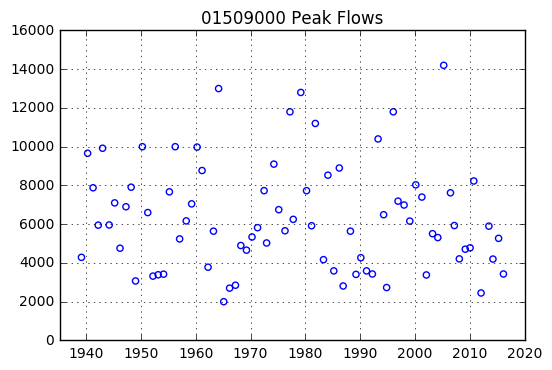

In [5]:
gage = '01509000_00060_dv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage)    

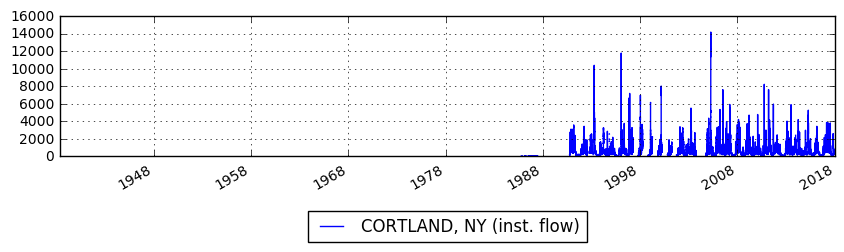

In [6]:
gage = '01509000_00060_iv'
p = df[gage].plot(figsize=(10,2), grid='on', label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

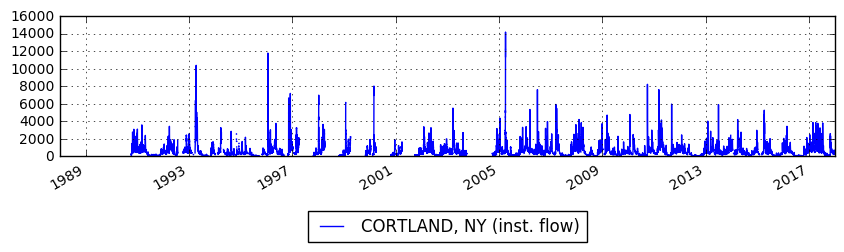

In [7]:
start, stop = '1988', '2018'
gage = '01509000_00060_iv'
p = df[gage][start:stop].plot(figsize=(10,2), grid='on',  label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

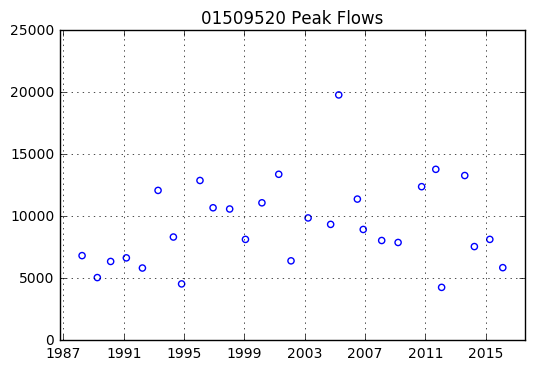

In [8]:
gage = '01509520_00065_iv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage)   

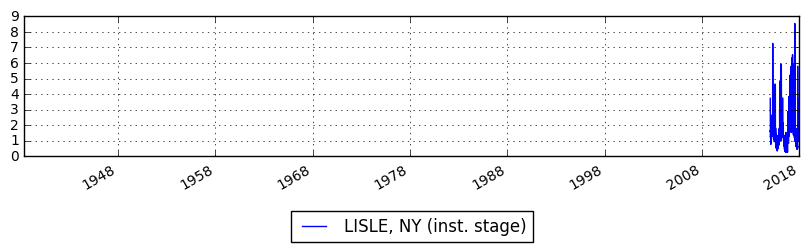

In [9]:
gage = '01509520_00065_iv'
p = df[gage].plot(figsize=(10,2), grid='on', label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

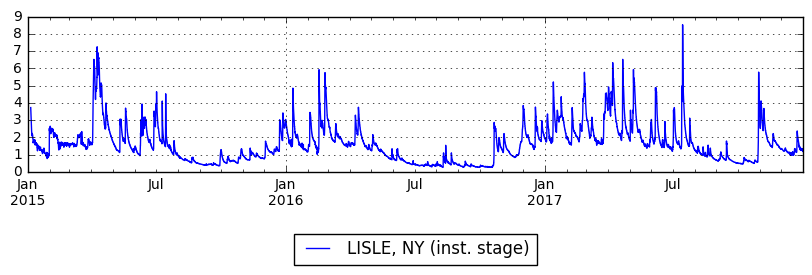

In [10]:
start, stop = '2015', '2017'
gage = '01509520_00065_iv'
p = df[gage][start:stop].plot(figsize=(10,2), grid='on',  label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

**Regulation began for this gage in 1942, following installation of the Dam**

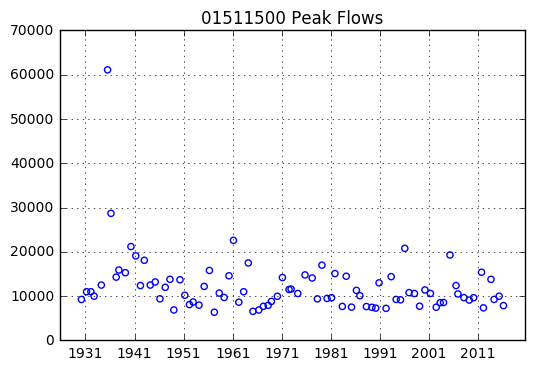

In [11]:
gage = '01511500_00065_iv'
peaks = Get_USGS_Peaks(gage.split('_')[0])
PlotPeaks(peaks, gage) 
printbold('Regulation began for this gage in 1942, following installation of the Dam')

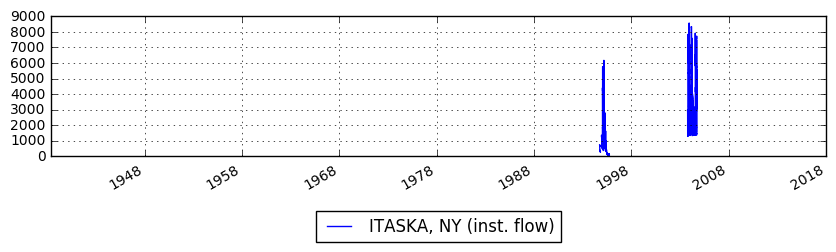

In [12]:
gage = '01511500_00060_iv'
p = df[gage].plot(figsize=(10,2), grid='on', label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

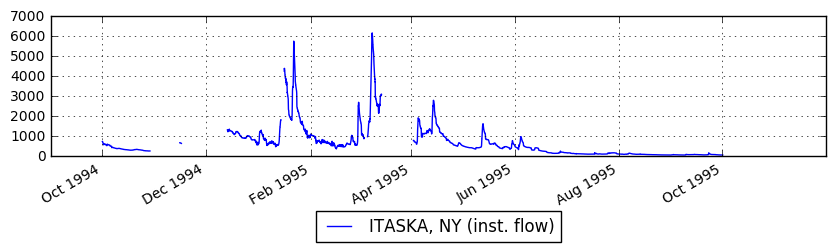

In [13]:
start, stop = '1994-09', '1995-11'
gage = '01511500_00060_iv'
p = df[gage][start:stop].plot(figsize=(10,2), grid='on',  label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

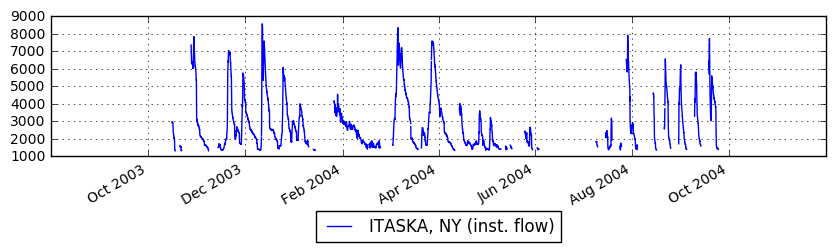

In [14]:
start, stop = '2003-08', '2004-11'
gage = '01511500_00060_iv'
p = df[gage][start:stop].plot(figsize=(10,2), grid='on',  label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.5))

# Let's take a look at the stage records

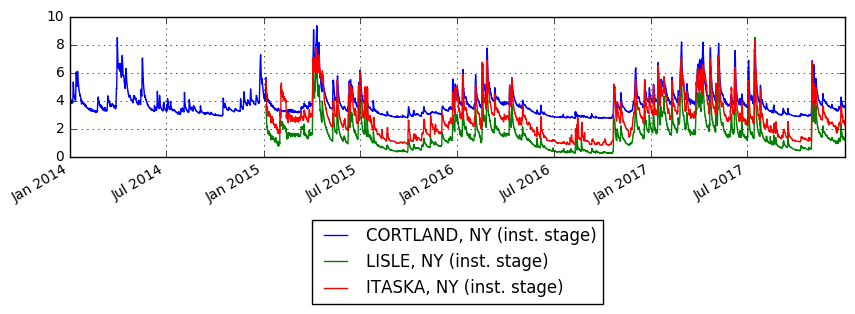

In [15]:
g1, g2, g3 ='01509000_00065_iv','01509520_00065_iv' , '01511500_00065_iv'
start, stop = '2014', '2017'

p = df[g1][start:stop].plot(figsize=(10,2), grid='on', label = legend_dict[g1])
p = df[g2][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g2])
p = df[g3][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g3])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))

## Lets look at the hydrograph shapes at the different gages:
##### Late Winter/Early Fall

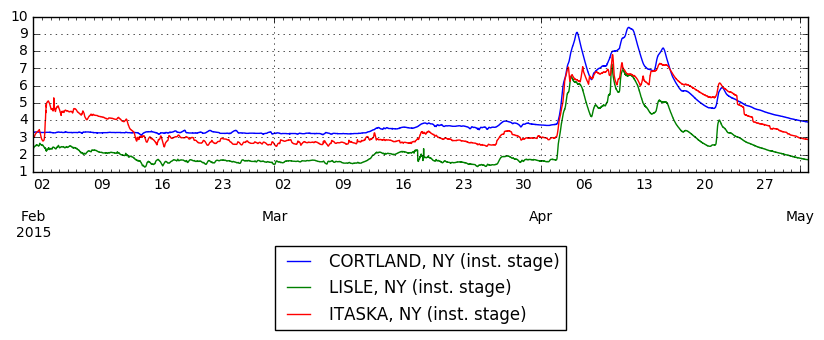

In [16]:
start, stop = '2015-02-01', '2015-05-01'
p = df[g1][start:stop].plot(figsize=(10,2), grid='on', label = legend_dict[g1])
p = df[g2][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g2])
p = df[g3][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g3])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))

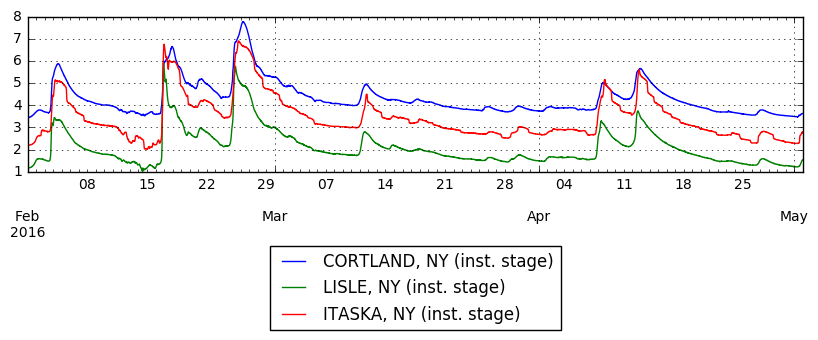

In [21]:
start, stop = '2016-02-01', '2016-05-01'
p = df[g1][start:stop].plot(figsize=(10,2), grid='on', label = legend_dict[g1])
p = df[g2][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g2])
p = df[g3][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g3])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))

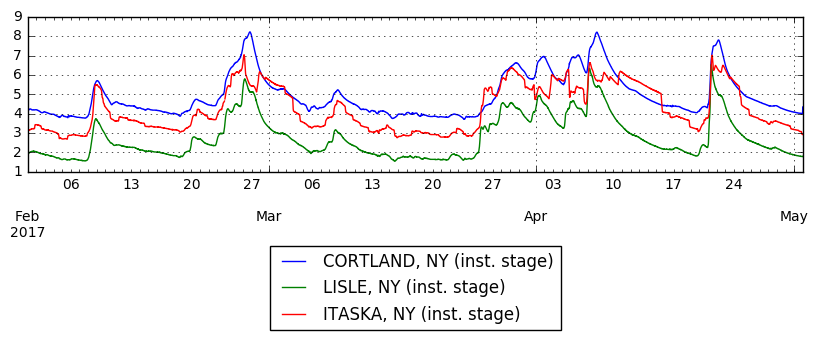

In [18]:
start, stop = '2017-02-01', '2017-05-01'
p = df[g1][start:stop].plot(figsize=(10,2), grid='on', label = legend_dict[g1])
p = df[g2][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g2])
p = df[g3][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g3])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))

## Lets look at the hydrograph shapes at the different gages:
##### Top Summer Storm w/available data at all gages

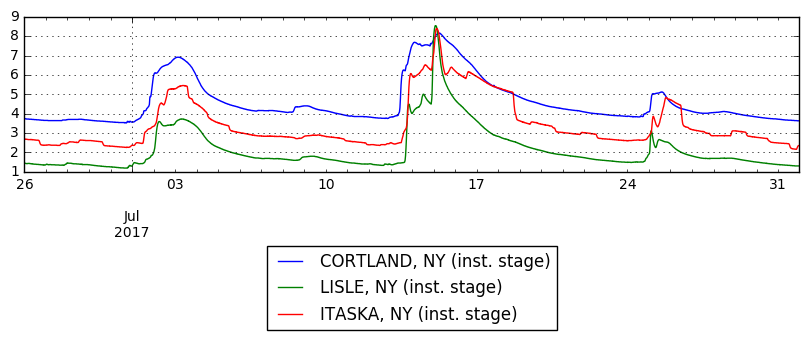

In [19]:
start, stop = '2017-06-26','2017-07-31'
p = df[g1][start:stop].plot(figsize=(10,2), grid='on', label = legend_dict[g1])
p = df[g2][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g2])
p = df[g3][start:stop ].plot(figsize=(10,2), grid='on', label = legend_dict[g3])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))

## Plot out Peak Storm w/instantaneous data


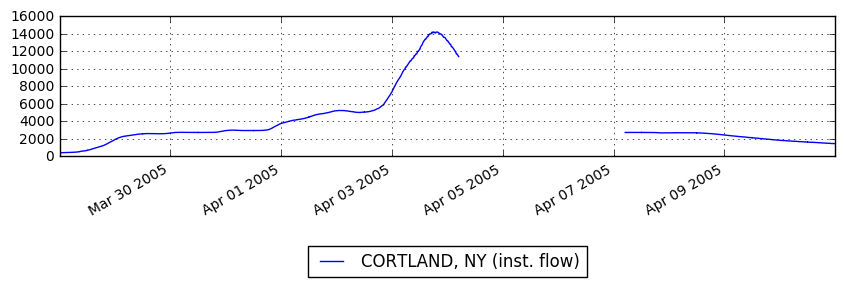

In [20]:
start, stop ='2005-03-28', '2005-04-10'
gage = '01509000_00060_iv'
p = df[gage][start:stop].plot(figsize=(10,2), grid='on',  label = legend_dict[gage])
p.legend(loc='center', bbox_to_anchor=(0.5,-0.75))